# Topics:
    Groupby
    aggerigate
    Series and dataframe methods on groupby dataframe
    Data Visualization
        * pandas
        * matplotlib
        * seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%%time
df = pd.read_excel("./groupby.xlsx")
df.info()
print(df.describe())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user id           40 non-null     int64         
 1   account no        40 non-null     object        
 2   transaction id    40 non-null     int64         
 3   type              40 non-null     object        
 4   city              40 non-null     object        
 5   Transaction date  40 non-null     datetime64[ns]
 6   amount            40 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.3+ KB
        user id  transaction id        amount
count  40.00000       40.000000     40.000000
mean    4.02500       20.500000  18100.000000
std     4.38814       11.690452  21074.714464
min     1.00000        1.000000   1000.000000
25%     1.00000       10.750000   1500.000000
50%     2.00000       20.500000   2000.000000
75%     5.25000      

,user id,account no,transaction id,type,city,Transaction date,amount
0,1,a1,1,ibft,karachi,2022-03-01,1000
1,1,a1,2,ft,karachi,2022-01-05,2000


## Syntax:

In [5]:
#dataframename.GROUPBY([dfcol1, dfcol2,...]).SeriesMethod()
r1 = df.groupby(["city"]).apply(len)
r1

city
Lahore        9
islamabad     7
karachi      24
dtype: int64

In [6]:
#dataframename.GROUPBY([dfcol1, dfcol2,...]).AGG(['count'])
r2 = df.groupby(['city']).agg(['count'])
r2

,user id,account no,transaction id,type,Transaction date,amount
,count,count,count,count,count,count
city,,,,,,
Lahore,9,9,9,9,9,9
islamabad,7,7,7,7,7,7
karachi,24,24,24,24,24,24


In [7]:
# dataframename.GROUPBY([dfcol1, dfcol2,...])['columName'].AGG(['count'])
r3 = df.groupby(['city'])['transaction id'].agg(['count'])
r3

,count
city,
Lahore,9
islamabad,7
karachi,24


In [9]:
r4 = df.groupby(["city"])['amount'].agg(['count','sum',np.mean])
r4

,count,sum,mean
city,,,
Lahore,9,97000,10777.777778
islamabad,7,350000,50000.000000
karachi,24,277000,11541.666667


In [16]:
r5 =  df.groupby(['city',"type"])['amount'].agg(['count','sum','mean', 'min','max',np.std]).sort_values(["count"], ascending=False)
# r5.sort_values(["count"], ascending=False ,inplace=True)
# r5.loc["karachi"]
r5

count     sum          mean    min    max          std
city      type                                                         
islamabad ibft       7  350000  50000.000000  50000  50000      0.00000
karachi   rtgs       7  252000  36000.000000  36000  36000      0.00000
          ibft       6    6000   1000.000000   1000   1000      0.00000
          topup      6    9000   1500.000000   1500   1500      0.00000
          ft         5   10000   2000.000000   2000   2000      0.00000
Lahore    ft         3    6000   2000.000000   2000   2000      0.00000
          ibft       3   52000  17333.333333   1000  50000  28290.16319
          topup      2    3000   1500.000000   1500   1500      0.00000
          rtgs       1   36000  36000.000000  36000  36000          NaN

## how we can apply series method through groupby

In [24]:
r6 = df.groupby(['city'])['user id'].unique()
r6

city
Lahore           [6, 2, 5, 1, 8, 10]
islamabad                 [1, 2, 10]
karachi      [1, 2, 5, 9, 21, 8, 12]
Name: user id, dtype: object

In [26]:
r6.loc["islamabad"]

array([ 1,  2, 10])

In [27]:
r6.iloc[0]

array([ 6,  2,  5,  1,  8, 10])

In [18]:
r6 = df.groupby(['city'])['user id'].unique().apply(len)
r6

city
Lahore       6
islamabad    3
karachi      7
Name: user id, dtype: int64

In [28]:
icap = np.array([10,20,3,7,26,2])
icap

array([10, 20,  3,  7, 26,  2])

In [30]:
print(np.in1d(icap,[6, 2, 5, 1, 8, 10]))
np.in1d(icap,[6, 2, 5, 1, 8, 10]).sum()

[ True False False False False  True]


2

In [46]:
r6 = df.groupby(['city'])['user id'].unique()
r6.apply(lambda x:np.in1d(x,icap).sum())

city
Lahore       2
islamabad    2
karachi      1
Name: user id, dtype: int64

In [43]:
r6.apply(lambda x:np.in1d(x,icap).sum())

city
Lahore       2
islamabad    2
karachi      1
Name: user id, dtype: int64

# Date time

In [48]:
# <functionName>= mont, day, year, quarter,
# <functionName>= .strftime("") %Y %m %d %b %B
# dataframname.GROUPBY([df['column'].dt.<functionName>]).AGG(['count'])
r1 = df.groupby([df['Transaction date'].dt.year])['amount'].agg(['count'])
r1

,count
Transaction date,
2021,16
2022,24


In [49]:
# <functionName>= mont, day, year, quarter,
# <functionName>= .strftime("") %Y %m %d %b %B
# dataframname.GROUPBY([df['column'].dt.<functionName>]).AGG(['count'])
r1 = df.groupby([df['Transaction date'].dt.year,
                df['Transaction date'].dt.month])['amount'].agg(['count'])
r1

count
Transaction date Transaction date       
2021             6                    16
2022             1                    16
                 3                     8

In [51]:
# <functionName>= mont, day, year, quarter,
# <functionName>= .strftime("") %Y %m %d %b %B
# dataframname.GROUPBY([df['column'].dt.<functionName>]).AGG(['count'])
r1 = df.groupby([df['Transaction date'].dt.year.rename("Y"),
                df['Transaction date'].dt.quarter.rename("Q")])['amount'].agg(['count'])
r1

,,count
Y,Q,
2021,2,16
2022,1,24


In [56]:
r1 = df.groupby([df['Transaction date'].dt.strftime("%Y %B")])['amount'].agg(['count'])
r1

,count
Transaction date,
2021 June,16
2022 January,16
2022 March,8


In [8]:
df

,user id,account no,transaction id,type,city,Transaction date,amount
0,1,a1,1,ibft,karachi,2022-03-01,1000
1,1,a1,2,ft,karachi,2022-01-05,2000
2,1,a2,3,topup,karachi,2021-06-06,1500
3,1,a2,4,rtgs,karachi,2022-01-05,36000
4,1,a2,5,ibft,islamabad,2021-06-06,50000
5,2,b1,6,ibft,karachi,2022-03-01,1000
6,2,b1,7,ft,karachi,2022-01-05,2000
7,2,b1,8,topup,karachi,2021-06-06,1500
8,2,b1,9,rtgs,karachi,2022-01-05,36000
9,2,b1,10,ibft,islamabad,2021-06-06,50000


# Data Visualization

In [63]:
r1

,,count
Y,Q,
2021,2,16
2022,1,24


<AxesSubplot:xlabel='Y,Q'>

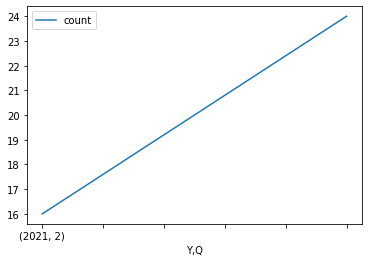

In [58]:
r1 = df.groupby([df['Transaction date'].dt.year.rename("Y"),
                df['Transaction date'].dt.quarter.rename("Q")])['amount'].agg(['count'])
r1.plot()

<AxesSubplot:xlabel='Y,Q'>

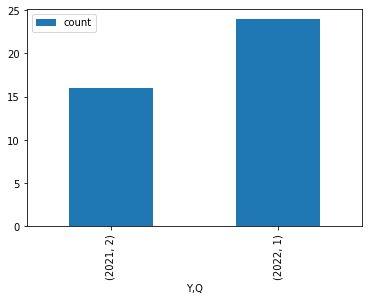

In [59]:
r1.plot(kind='bar')

<AxesSubplot:xlabel='Y,Q'>

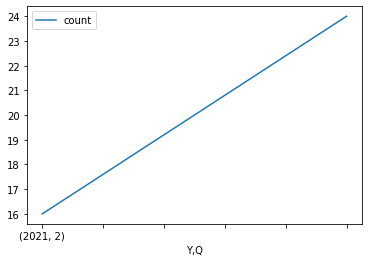

In [61]:
r1.plot(kind='line')

<AxesSubplot:ylabel='Y,Q'>

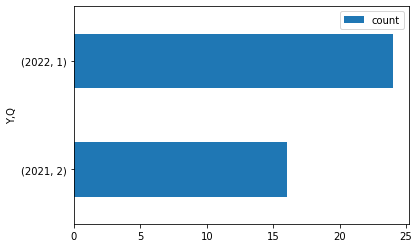

In [62]:
r1.plot(kind='barh')

<AxesSubplot:ylabel='Density'>

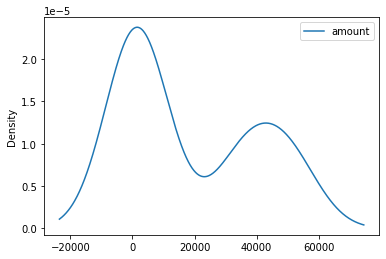

In [64]:
df[["amount"]].plot(kind='kde')

<AxesSubplot:xlabel='Y,Q'>

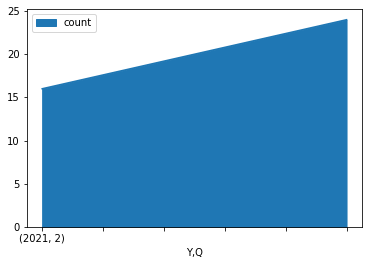

In [66]:
r1.plot(kind='area')

In [ ]:
- 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot (DataFrame only)
    - 'hexbin' : hexbin plot (DataFrame only)

# matplot lib

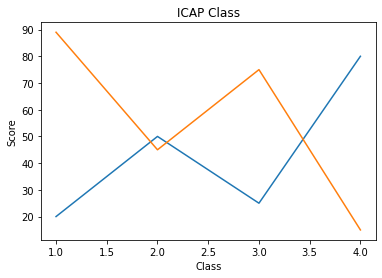

In [70]:
x = [1,2,3,4]
y = [20,50,25,80]
y1 = [89,45,75,15]

plt.title("ICAP Class")
plt.xlabel("Class")
plt.ylabel("Score")

plt.plot(x,y)
plt.plot(x,y1)

plt.show()

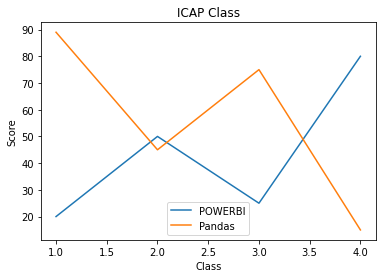

In [71]:
x = [1,2,3,4]
y = [20,50,25,80]
y1 = [89,45,75,15]

plt.title("ICAP Class")
plt.xlabel("Class")
plt.ylabel("Score")

plt.plot(x,y, label="POWERBI")
plt.plot(x,y1, label="Pandas")

plt.legend()
plt.show()

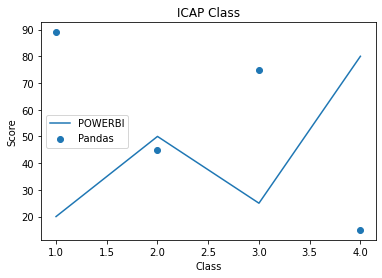

In [72]:
x = [1,2,3,4]
y = [20,50,25,80]
y1 = [89,45,75,15]

plt.title("ICAP Class")
plt.xlabel("Class")
plt.ylabel("Score")

plt.plot(x,y, label="POWERBI")
plt.scatter(x,y1, label="Pandas")

plt.legend()
plt.show()

In [ ]:
x = [1,2,3,4]
y = [20,50,25,80]

plt.title("ICAP Class")
plt.xlabel("Class")
plt.ylabel("Score")

plt.plot(x,y)
plt.show()

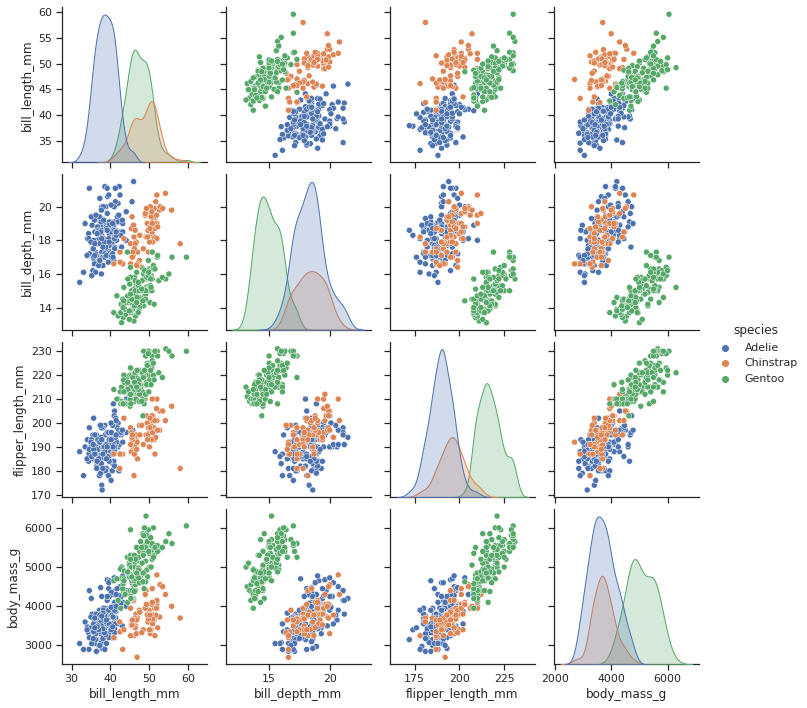

In [73]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [ ]:
pd.DataFrame.plot()